In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date
import matplotlib.pyplot as plt

In [52]:
ges = pd.read_csv("Gesden_todo.csv")

In [53]:
len(ges)

14392

In [54]:
ges["FecNacim"] = pd.to_datetime(ges["FecNacim"], format = "%d/%m/%Y")

In [55]:
ges.drop(ges.iloc[:,4:5] , axis=1, inplace=True)
ges.head()

,Num.Pac.,Apellidos,Nombre,FecNacim,Telf.Partic.,Telf.Trabajo,Telf.Movil,Direccion,CP,Sexo,Email
0,8394,DE LA ENCINA PEREZ,BEATRIZ NIREYA,1961-02-18,944330828,NaN,NaN,FICA N5 ENTRESUELO IZDA BILBAO,NaN,NaN,NaN
1,11793,MAY DE DAMAS,ADRIAN,2010-01-26,944054779,NaN,667581902,PADRE LOGENDIO Nº5 3ºDRCHA DRCHA,48008,H,BGONADAMAS@HOTMAIL.COM
2,7592,ZUGAZAGOITIA HERNANDO,ENEKO MIRENA,1985-06-10,944759131,NaN,NaN,"ARENAL CELESTINO PL. 10, 6º D",NaN,H,NaN
3,2918,.,.,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14180,.,PAVLO,NaT,NaN,NaN,NaN,NaN,NaN,NaN,filippskiy03@gmail.com


In [56]:
ges=ges.drop("Num.Pac.", axis=1)

In [57]:
ges=ges.drop(["Telf.Partic.","Telf.Trabajo"], axis=1)
ges.head()

,Apellidos,Nombre,FecNacim,Telf.Movil,Direccion,CP,Sexo,Email
0,DE LA ENCINA PEREZ,BEATRIZ NIREYA,1961-02-18,NaN,FICA N5 ENTRESUELO IZDA BILBAO,NaN,NaN,NaN
1,MAY DE DAMAS,ADRIAN,2010-01-26,667581902,PADRE LOGENDIO Nº5 3ºDRCHA DRCHA,48008,H,BGONADAMAS@HOTMAIL.COM
2,ZUGAZAGOITIA HERNANDO,ENEKO MIRENA,1985-06-10,NaN,"ARENAL CELESTINO PL. 10, 6º D",NaN,H,NaN
3,.,.,NaT,NaN,NaN,NaN,NaN,NaN
4,.,PAVLO,NaT,NaN,NaN,NaN,NaN,filippskiy03@gmail.com


In [58]:
ges=ges.drop(["Direccion","CP"], axis=1)
ges.head()

,Apellidos,Nombre,FecNacim,Telf.Movil,Sexo,Email
0,DE LA ENCINA PEREZ,BEATRIZ NIREYA,1961-02-18,NaN,NaN,NaN
1,MAY DE DAMAS,ADRIAN,2010-01-26,667581902,H,BGONADAMAS@HOTMAIL.COM
2,ZUGAZAGOITIA HERNANDO,ENEKO MIRENA,1985-06-10,NaN,H,NaN
3,.,.,NaT,NaN,NaN,NaN
4,.,PAVLO,NaT,NaN,NaN,filippskiy03@gmail.com


In [59]:
ges.Email.isna().sum()

8730

In [63]:
ges.Email.value_counts().sum()

5662

In [43]:
ges.Email.value_counts().head(20)

NO USA                           425
NO TIENE                          37
NO USA!!!                         33
NO                                31
NO UTILIZA                        29
-                                 14
NO USA!!                          14
NO USA!!!!                         7
NO USA!                            5
NO QUIERE DARLO                    4
anderxabier@telefonica.net         4
familiamusitu@gmail.com            4
maria.pamamo@gmail.com             4
EMIKELARENA@GMAIL.COM              3
rioberasategui@telefonica.net      3
APALACIOG@GMAIL.COM                3
BARBADILLO179@HOTMAIL.COM          3
cgomeza87@hotmail.com              3
SESEMAMON@YAHOO.ES                 3
CUANDO HAGA FALTA                  3
Name: Email, dtype: int64

In [64]:
ges_email = ges.dropna(subset=['Email']) #Tiramos los NaN de Email

In [65]:
ges.Email.value_counts().sum()

5662

In [67]:
regex = r'^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}$'  
ges_email= ges_email[ges_email['Email'].str.contains(regex)]

#Nos quedamos solo con los valores que tienen un @, por ejemplo (Regex, regular expression)

In [83]:
ges_email.Email.value_counts().head(104)

maria.pamamo@gmail.com         4
familiamusitu@gmail.com        4
anderxabier@telefonica.net     4
aaxpe@ecna.es                  3
elena.romero@ehu.es            3
                              ..
mariarosa_73@hotmail.com       2
iramin_20@hotmail.com          1
salvamonre@gmail.com           1
charolantaron@euskalnet.net    1
senaski14@hotmail.com          1
Name: Email, Length: 104, dtype: int64

In [86]:
ges_email=ges_email.drop_duplicates(subset ="Email")

#Tiramos duplicados

In [87]:
ges_email.Email.value_counts().sum()

3167

In [15]:
ges_email.head()

,Apellidos,Nombre,FecNacim,Telf.Movil,Sexo,Email
4,.,PAVLO,NaT,NaN,NaN,filippskiy03@gmail.com
5,ABAD ALVAREZ,MARIA LUZ,1967-12-03,696031962,M,quinoy5@hotmail.com
6,ABAD ARMENTIA,KOLDO,1973-05-26,677983353,H,koldo@moyua.com
12,ABAD ITURRIARTE,CELINA,1956-03-23,627432645,M,cabad56@gmail.com
15,ABADEA BEITIA,ROSA MARÍA,1955-08-03,630566641,M,josemariri@outlook.com


In [16]:
ges_email['Edad'] = (pd.Timestamp('now') - ges_email.FecNacim)/pd.Timedelta('1Y')
ges_email["Edad"] = round(ges_email['Edad'], 0)

ges_email.head()

#Añadimos columna edad con edad

c:\Users\aitor\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3398: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Apellidos,Nombre,FecNacim,Telf.Movil,Sexo,Email,Edad
4,.,PAVLO,NaT,NaN,NaN,filippskiy03@gmail.com,NaN
5,ABAD ALVAREZ,MARIA LUZ,1967-12-03,696031962,M,quinoy5@hotmail.com,55.0
6,ABAD ARMENTIA,KOLDO,1973-05-26,677983353,H,koldo@moyua.com,49.0
12,ABAD ITURRIARTE,CELINA,1956-03-23,627432645,M,cabad56@gmail.com,66.0
15,ABADEA BEITIA,ROSA MARÍA,1955-08-03,630566641,M,josemariri@outlook.com,67.0


In [84]:
ges_email.Sexo.isna().sum()

508

In [17]:
# This function converts given date to age
# def age(born):
#     born = datetime.strptime(born, "%d/%m/%Y").date()
#     today = date.today()
#     return today.year - born.year - ((today.month, 
#                                       today.day) < (born.month, 
#                                                     born.day))
  
# ges_email["Edad"] = ges_email["FecNacim"].apply(age)
  
# display(ges_email)

In [18]:
ges_email_H = ges_email[ges_email["Sexo"]=="H"]
ges_email_M = ges_email[ges_email["Sexo"]=="M"]

#Como no sé cómo quitar los NaN de Sexo, cojo M y H por separado y luego los junto con pd.concat

In [19]:
ges_email_H

,Apellidos,Nombre,FecNacim,Telf.Movil,Sexo,Email,Edad
6,ABAD ARMENTIA,KOLDO,1973-05-26,677983353,H,koldo@moyua.com,49.0
23,ABAITUA PEREZ DEL RÍO,DIEGO,1977-03-12,699899529,H,diego@bilaw.es,45.0
45,ABDELNASER ABDELRAHMAN,AMGAD,1996-01-06,NaN,H,khamiskhamis102@gmail.com,27.0
66,ACASUSO LOPEZ,IGNACIO,1967-09-01,699426885,H,ignacio.acasuso@ehu.es,55.0
77,ACEVEDO PAULOGORRAN,ADUR,2009-02-06,606222752,H,galapaulogorran@hotmail.com,14.0
...,...,...,...,...,...,...,...
14307,ZORRILLA SANCHEZ,JOSE IGNACIO,1958-11-11,690695955,H,inaki.zorrilla@bizkaia.net,64.0
14329,ZUBERO AZKUENAGA,IBAI,1986-11-25,688610223,H,ibaizubero@hotmail.com,36.0
14332,ZUBIAGA RODRIGUEZ,ENRIQUE,1957-04-26,627919037,H,ei.zubiaga@bbva.com,65.0
14334,ZUBIAGA RONCERO,GUILLERMO,1990-09-11,647186154,H,gezubiaga@gmail.com,32.0


In [85]:
ges_email_M

,Apellidos,Nombre,FecNacim,Telf.Movil,Sexo,Email,Edad
5,ABAD ALVAREZ,MARIA LUZ,1967-12-03,696031962,M,quinoy5@hotmail.com,55.0
12,ABAD ITURRIARTE,CELINA,1956-03-23,627432645,M,cabad56@gmail.com,66.0
15,ABADEA BEITIA,ROSA MARÍA,1955-08-03,630566641,M,josemariri@outlook.com,67.0
29,ABALOS CUICA,NORMA,1960-04-03,639673112,M,normanavales@gmail.com,62.0
30,ABAROA DOMINGUEZ,ANA,1968-04-18,677831188,M,ana.abaroa@gmail.com,54.0
...,...,...,...,...,...,...,...
14354,ZUDAIRE ARANGUREN,LARA,1992-07-28,685330970,M,larazuar@gmail.com,30.0
14357,ZUFIA URIARTE,LUCIA,1964-12-21,620920722,M,lucia.lamincer@gmail.com,58.0
14362,ZULAIKA PORTILLO,ARITOKIETA,1982-10-21,652764614,M,zulaikarritxu@hotmail.com,40.0
14367,ZULUAGA GRANEL,SUSANA,1984-02-25,NaN,M,susanazg@hotmail.com,38.0


In [20]:
tablas = [ges_email_M, ges_email_H]

ges_limpio = pd.concat(tablas)

In [21]:
ges_limpio.head()

,Apellidos,Nombre,FecNacim,Telf.Movil,Sexo,Email,Edad
5,ABAD ALVAREZ,MARIA LUZ,1967-12-03,696031962,M,quinoy5@hotmail.com,55.0
12,ABAD ITURRIARTE,CELINA,1956-03-23,627432645,M,cabad56@gmail.com,66.0
15,ABADEA BEITIA,ROSA MARÍA,1955-08-03,630566641,M,josemariri@outlook.com,67.0
29,ABALOS CUICA,NORMA,1960-04-03,639673112,M,normanavales@gmail.com,62.0
30,ABAROA DOMINGUEZ,ANA,1968-04-18,677831188,M,ana.abaroa@gmail.com,54.0


In [22]:
ges_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 5 to 14366
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Apellidos   2671 non-null   object        
 1   Nombre      2671 non-null   object        
 2   FecNacim    2665 non-null   datetime64[ns]
 3   Telf.Movil  2585 non-null   object        
 4   Sexo        2671 non-null   object        
 5   Email       2671 non-null   object        
 6   Edad        2665 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 166.9+ KB


In [23]:
len(ges_limpio)

2671

In [24]:
ges_limpio["Sexo"] = ges_limpio["Sexo"].apply(lambda x: 1 if x == "H" else 0)

In [25]:
ges_limpio.to_csv('Gesden_limpio_email_MH.csv')

In [26]:
ges_limpio.describe()

,Sexo,Edad
count,2671.000000,2665.000000
mean,0.408836,49.185741
std,0.491711,15.194251
min,0.000000,6.000000
25%,0.000000,38.000000
50%,0.000000,49.000000
75%,1.000000,61.000000
max,1.000000,99.000000


<AxesSubplot:>

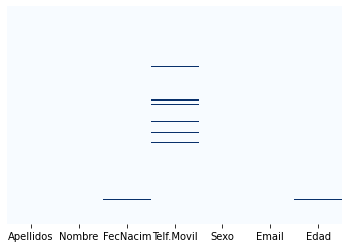

In [27]:
sns.heatmap(ges_limpio.isnull(), yticklabels=False, cbar=False, cmap = "Blues") # le pedimos a sns que nos dibuje un mapa de calor,
#indicando si es null o no el dato de cada columna y fila, con yticklabels false dejamos de poner el texto en el eje Y y con
# cbar false dejamos de poner la barra medidora

array([[<AxesSubplot:title={'center':'FecNacim'}>,
        <AxesSubplot:title={'center':'Sexo'}>],
       [<AxesSubplot:title={'center':'Edad'}>, <AxesSubplot:>]],
      dtype=object)

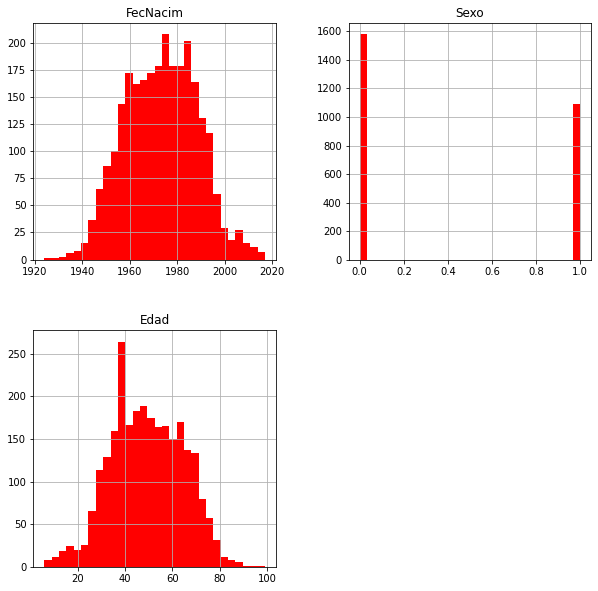

In [28]:
ges_limpio.hist(bins=30, figsize=(10,10), color="r")